In [67]:
import pandas as pd
from pylab import rcParams

train_stances = pd.read_csv('../fnc-1-baseline-master/fnc-1/train_stances.csv')
train_bodies = pd.read_csv('../fnc-1-baseline-master/fnc-1/train_bodies.csv')
train = train_stances.join(train_bodies.set_index('Body ID'), on='Body ID')

test_stances = pd.read_csv('../fnc-1-baseline-master/fnc-1/competition_test_stances.csv')
test_bodies = pd.read_csv('../fnc-1-baseline-master/fnc-1/competition_test_bodies.csv')
test = test_stances.join(test_bodies.set_index('Body ID'), on='Body ID')

In [12]:
train.replace('disagree', 0, inplace=True)
train.replace('agree', 1, inplace=True)
train.replace('discuss', 2, inplace=True)
train.replace('unrelated', 3, inplace=True)

test.replace('disagree', 0, inplace=True)
test.replace('agree', 1, inplace=True)
test.replace('discuss', 2, inplace=True)
test.replace('unrelated', 3, inplace=True)

In [11]:
train['combinedText'] = "<sos> <head> " + train['Headline'] + " </head> <body> " + train['articleBody'] + " </body> <eos>" 
test['combinedText'] = "<sos> <head> " + test['Headline'] + " </head> <body> " + test['articleBody'] + " </body> <eos>" 

In [ ]:
train.to_csv('msci-nlp-w22-fnc/data/train.csv', index=False, encoding = 'utf-8')
test.to_csv('msci-nlp-w22-fnc/data/test.csv', index=False, encoding='utf-8')

In [ ]:
print(test.iloc[0]['combinedText'])

<sos> <head> Ferguson riots: Pregnant woman loses eye after cops fire BEAN BAG round through car window </head> <body> A RESPECTED senior French police officer investigating the Charlie Hebdo magazine massacre took his own life mere hours after the horrific attacks stunned the world.

Commissioner Helric Fredou, 45, turned a gun on himself in his police office in Limoges last Wednesday night, reported France 3.

A colleague found his body at 1am on Thursday, the day after three gunmen fired at the satirical magazine's office and left 12 people dead.

Speaking to our sister publication Mirror Online, the Union of Commissioners of the National Police confirmed Mr Fredou had taken his own life.


In a statement released after his death, a union spokesman said: "It is with great sadness that we were informed this morning of the death of our colleague Helric Fredou, assigned as Deputy Director of the Regional Service Judicial Police in Limoges.

"On this particular day of national mourning,

In [ ]:
test.head(10)

,Headline,Body ID,Stance,articleBody,combinedText
0,Ferguson riots: Pregnant woman loses eye after...,2008,3,A RESPECTED senior French police officer inves...,<sos> <head> Ferguson riots: Pregnant woman lo...
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,3,Dave Morin's social networking company Path is...,<sos> <head> Crazy Conservatives Are Sure a Gi...
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,3,A bereaved Afghan mother took revenge on the T...,<sos> <head> A Russian Guy Says His Justin Bie...
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,3,Hewlett-Packard is officially splitting in two...,<sos> <head> Zombie Cat: Buried Kitty Believed...
4,Argentina's President Adopts Boy to End Werewo...,37,3,An airline passenger headed to Dallas was remo...,<sos> <head> Argentina's President Adopts Boy ...
5,Next-generation Apple iPhones' features leaked,2353,3,When faced with the choice of feasting on a fi...,<sos> <head> Next-generation Apple iPhones' fe...
6,Saudi national airline may introduce gender se...,192,3,The US declared the video of Sotloff to be aut...,<sos> <head> Saudi national airline may introd...
7,'Zombie Cat' Claws Way Out Of Grave And Into O...,2482,3,19-year-old Iga Jasica of Poland began making ...,<sos> <head> 'Zombie Cat' Claws Way Out Of Gra...
8,"ISIS might be harvesting organs, Iraq tells UN",250,3,Michael Foley says the administration threaten...,"<sos> <head> ISIS might be harvesting organs, ..."
9,Woman has surgery to get third breast: The thr...,85,3,Brian Stelter from CNN just reported that hack...,<sos> <head> Woman has surgery to get third br...


/srv/jupyter_python3-extras/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of each label')

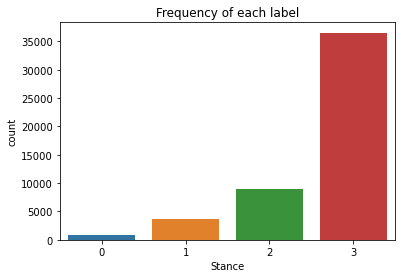

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['Stance'])
plt.xlabel('Stance')
plt.title("Frequency of each label")

In [17]:
train['Stance'].value_counts()

3    36545
2     8909
1     3678
0      840
Name: Stance, dtype: int64

In [10]:
len(train_stances['Headline'].unique())

1648

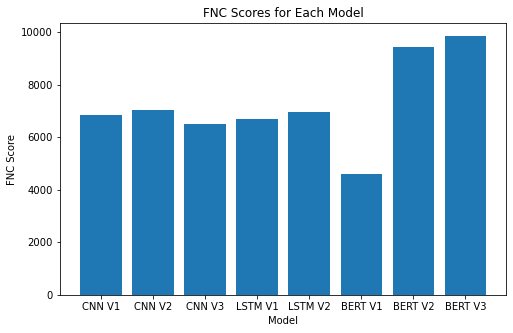

In [68]:
fnc_scores = {
    'CNN V1': 6846.5,
    'CNN V2': 7026.0,
    'CNN V3': 6499.75,
    'LSTM V1': 6696.0,
    'LSTM V2': 6951.0,
    'BERT V1': 4587.25,
    'BERT V2': 9434.0,
    'BERT V3': 9858.0
}

plt.bar(range(len(fnc_scores)), list(fnc_scores.values()), align='center')
plt.xticks(range(len(fnc_scores)), list(fnc_scores.keys()))
plt.title("FNC Scores for Each Model")
plt.xlabel("Model")
plt.ylabel("FNC Score")
rcParams['figure.figsize'] = 8, 5
plt.show()


     Model  Disagree  Agree  Discuss  Unrelated
0   CNN V1     0.003  0.231    0.433      0.807
1   CNN V2     0.101  0.283    0.478      0.827
2   CNN V3     0.047  0.262    0.417      0.791
3  LSTM V1     0.007  0.248    0.450      0.845
4  LSTM V2     0.067  0.289    0.468      0.830
5  BERT V1     0.000  0.000    0.000      0.839
6  BERT V2     0.003  0.537    0.730      0.981
7  BERT V3     0.236  0.612    0.800      0.983


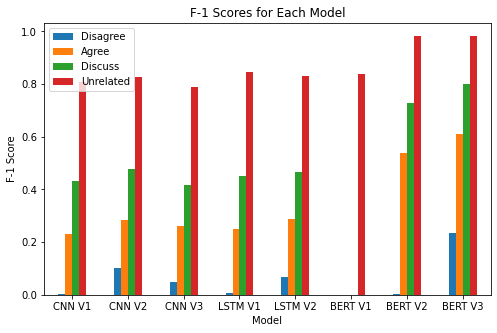

In [66]:
f1_scores_df = pd.DataFrame(
    [['CNN V1', 0.003, 0.231, 0.433, 0.807], ['CNN V2', 0.101, 0.283, 0.478, 0.827], 
    ['CNN V3', 0.047, 0.262, 0.417, 0.791], ['LSTM V1', 0.007, 0.248, 0.450, 0.845],
    ['LSTM V2', 0.067, 0.289, 0.468, 0.830], ['BERT V1', 0.0, 0.0, 0.0, 0.839],
    ['BERT V2', 0.003, 0.537, 0.730, 0.981], ['BERT V3', 0.236, 0.612, 0.800, 0.983]],
    columns=['Model', 'Disagree', 'Agree', 'Discuss', 'Unrelated']
)

print(f1_scores_df)
f1_scores_df.plot(x='Model',
                  kind='bar',
                  stacked=False,
                  title='F-1 Scores for Each Model')
plt.xticks(rotation=0)
plt.ylabel('F-1 Score')

rcParams['figure.figsize'] = 8, 5
# plt.rcParams['figure.figsize'] = (20,3)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
